In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
import re
from matplotlib import pyplot as plt
from pprint import pprint
tool_dir = '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/ESMF_profiling'
sys.path.append(tool_dir)
from esmf_related_functions import _read_ryaml, _expt_fullname, _extract_ntasks_values, _extract_restart_stop_values
from esmfFileParser import collect_runtime_tot

In [3]:
pics_folder = "esmf-profiling"
pics_folder = os.path.join(tool_dir, pics_folder)
os.makedirs(pics_folder, exist_ok=True)

In [4]:
expts_manager_path = '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager'
yaml_input = os.path.join(expts_manager_path, 'Expts_manager-025deg-scaling_performance.yaml')
yamlfile_path = os.path.join(tool_dir,yaml_input)
yaml_input = _read_ryaml(yamlfile_path)
test_rel_path = yaml_input['test_path']
esmf_expt_dir1 = yaml_input['namelists']['cross_block1']['cross_block1_dirs']
esmf_expt_dirs = list(esmf_expt_dir1)
MOM_full_paths = [os.path.join(expts_manager_path, test_rel_path, esmf_expt_dir) for esmf_expt_dir in  esmf_expt_dirs]
xxx = '000'
ESMF_path = [f"{MOM_full_path}/archive/output{xxx}" for MOM_full_path in MOM_full_paths]
ncpus_list_combo1 = yaml_input['namelists']['cross_block1']['nuopc.runconfig']['PELAYOUT_attributes_combo']
expt_names1 = _expt_fullname(ncpus_list_combo1)
clock1_list_combo1 = yaml_input['namelists']['cross_block1']['nuopc.runconfig']['CLOCK_attributes_combo']
clock1 = _expt_fullname(clock1_list_combo1)
pprint(ESMF_path)
pprint(expt_names1)
pprint(clock1)

['/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg_scaling_performance/pt_1_test/archive/output000',
 '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg_scaling_performance/pt_2_test/archive/output000',
 '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg_scaling_performance/pt_3_test/archive/output000',
 '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg_scaling_performance/pt_4_test/archive/output000',
 '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg_scaling_performance/pt_5_test/archive/output000',
 '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg_scaling_performance/pt_6_test/archive/output000',
 '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_0.25deg_scaling_performance/pt_7_test/archive/output000',
 '/g/data/tm70/ml0072/COMMO

In [5]:
date_values = _extract_restart_stop_values(clock1)
date_values

[{'restart_n': 1,
  'restart_option': 'ndays',
  'stop_n': 1,
  'stop_option': 'ndays'},
 {'restart_n': 1,
  'restart_option': 'ndays',
  'stop_n': 1,
  'stop_option': 'ndays'},
 {'restart_n': 1,
  'restart_option': 'ndays',
  'stop_n': 1,
  'stop_option': 'ndays'},
 {'restart_n': 1,
  'restart_option': 'ndays',
  'stop_n': 1,
  'stop_option': 'ndays'},
 {'restart_n': 1,
  'restart_option': 'ndays',
  'stop_n': 1,
  'stop_option': 'ndays'},
 {'restart_n': 1,
  'restart_option': 'ndays',
  'stop_n': 1,
  'stop_option': 'ndays'},
 {'restart_n': 10,
  'restart_option': 'ndays',
  'stop_n': 10,
  'stop_option': 'ndays'},
 {'restart_n': 1,
  'restart_option': 'nmonths',
  'stop_n': 1,
  'stop_option': 'nmonths'},
 {'restart_n': 1,
  'restart_option': 'nmonths',
  'stop_n': 1,
  'stop_option': 'nmonths'},
 {'restart_n': 1,
  'restart_option': 'nmonths',
  'stop_n': 1,
  'stop_option': 'nmonths'}]

In [6]:
task_values = _extract_ntasks_values(expt_names1)
task_values

[{'atm_ntasks': 48,
  'cpl_ntasks': 96,
  'ice_ntasks': 288,
  'ocn_ntasks': 1152,
  'ocn_rootpe': 288,
  'rof_ntasks': 48},
 {'atm_ntasks': 48,
  'cpl_ntasks': 96,
  'ice_ntasks': 240,
  'ocn_ntasks': 1200,
  'ocn_rootpe': 240,
  'rof_ntasks': 48},
 {'atm_ntasks': 48,
  'cpl_ntasks': 288,
  'ice_ntasks': 288,
  'ocn_ntasks': 1152,
  'ocn_rootpe': 288,
  'rof_ntasks': 48},
 {'atm_ntasks': 48,
  'cpl_ntasks': 240,
  'ice_ntasks': 240,
  'ocn_ntasks': 1200,
  'ocn_rootpe': 240,
  'rof_ntasks': 48},
 {'atm_ntasks': 48,
  'cpl_ntasks': 192,
  'ice_ntasks': 288,
  'ocn_ntasks': 1152,
  'ocn_rootpe': 288,
  'rof_ntasks': 48},
 {'atm_ntasks': 48,
  'cpl_ntasks': 48,
  'ice_ntasks': 288,
  'ocn_ntasks': 1152,
  'ocn_rootpe': 288,
  'rof_ntasks': 48},
 {'atm_ntasks': 48,
  'cpl_ntasks': 48,
  'ice_ntasks': 288,
  'ocn_ntasks': 1152,
  'ocn_rootpe': 288,
  'rof_ntasks': 48},
 {'atm_ntasks': 48,
  'cpl_ntasks': 48,
  'ice_ntasks': 288,
  'ocn_ntasks': 1152,
  'ocn_rootpe': 288,
  'rof_ntasks': 48

In [7]:
regionNames = [
    '[ESMF]',
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN] RunPhase1',
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ICE] RunPhase1',
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ATM] RunPhase1',
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ROF] RunPhase1',

    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED-TO-OCN] RunPhase1',
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN-TO-MED] RunPhase1',
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED-TO-ICE] RunPhase1',
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ICE-TO-MED] RunPhase1',

    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ATM-TO-MED] RunPhase1',
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ROF-TO-MED] RunPhase1',

    '[ESMF]/[ensemble] Init 1/[ESM0001] IPDv02p5/[MED] IPDv03p7/MED: (med_map_mod: RouteHandles_init)',
    '[ESMF]/[ensemble] Init 1/[ESM0001] IPDv02p3/[ATM] IPDv01p3',
    '[ESMF]/[ensemble] Init 1/[ESM0001] IPDv02p3/[ROF] IPDv01p3',
    '[ESMF]/[ensemble] Init 1/[ESM0001] IPDv02p3/[ICE] IPDv01p3',

]

In [8]:
%%time
profile_prefix='ESMF_Profile'
# ESMF_Profile.xxx    : (0. count, 1. total, 2. self_time, 3. mean    , 4. min_time, 5. max_time           )
# ESMF_Profile.summary: (0. count, 1. PETs , 2. mean     , 3. min_time, 4. max_time, 5. min_PET, 6. max_PET)
esmf_summary = True
index = 2
runtime_tot = collect_runtime_tot(ESMF_path, regionNames=regionNames, profile_prefix=profile_prefix, esmf_summary=esmf_summary, index=index)

CPU times: user 63.2 ms, sys: 17.9 ms, total: 81 ms
Wall time: 321 ms


In [9]:
len(runtime_tot)

10

Text(0.5, 1.0, 'total # 1440')

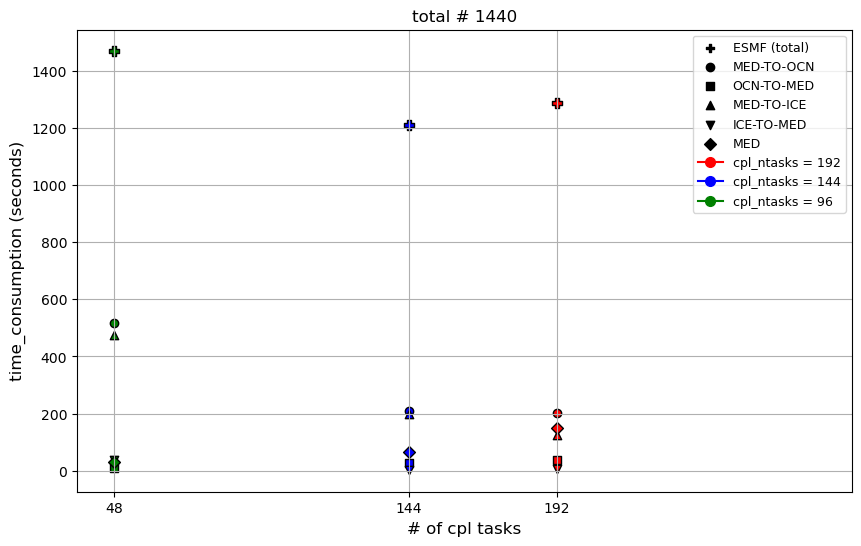

In [12]:
label_fontsize = 12
legend_fontsize = 9
nrows = 1
ncols = 1
figsize = (10, 6)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
axes = axes.flatten() if (nrows * ncols > 1) else [axes]

# Define colors for different datasets (cpl_ntasks)
colors = ['red', 'blue', 'green']
# Define markers for different variables (ESMF, MED-TO-OCN, etc.)
markers = ['P', 'o', 's', '^', 'v', 'D']
select_index = [-1, -2, -3]
cpl_ntasks = [task_values[i]['cpl_ntasks'] for i in select_index]

for j_index, i in enumerate(select_index):
    color = colors[j_index]

    axes[0].scatter(task_values[i]['cpl_ntasks'], runtime_tot[i][regionNames[0]], marker=markers[0],
                    facecolors=color, edgecolors='k', s=50)  # ESMF
    axes[0].scatter(task_values[i]['cpl_ntasks'], runtime_tot[i][regionNames[5]], marker=markers[1],
                    facecolors=color, edgecolors='k')  # MED-TO-OCN
    axes[0].scatter(task_values[i]['cpl_ntasks'], runtime_tot[i][regionNames[6]], marker=markers[2],
                    facecolors=color, edgecolors='k')  # OCN-TO-MED
    axes[0].scatter(task_values[i]['cpl_ntasks'], runtime_tot[i][regionNames[7]], marker=markers[3],
                    facecolors=color, edgecolors='k')  # MED-TO-ICE
    axes[0].scatter(task_values[i]['cpl_ntasks'], runtime_tot[i][regionNames[8]], marker=markers[4],
                    facecolors=color, edgecolors='k')  # ICE-TO-MED
    axes[0].scatter(task_values[i]['cpl_ntasks'], runtime_tot[i][regionNames[11]], marker=markers[5],
                    facecolors=color, edgecolors='k')  # MED

black_marker_legend = [
    plt.scatter([0], [0], marker=markers[0], facecolors='k', edgecolors='k', label="ESMF (total)"),
    plt.scatter([0], [0], marker=markers[1], facecolors='k', edgecolors='k', label="MED-TO-OCN"),
    plt.scatter([0], [0], marker=markers[2], facecolors='k', edgecolors='k', label="OCN-TO-MED"),
    plt.scatter([0], [0], marker=markers[3], facecolors='k', edgecolors='k', label="MED-TO-ICE"),
    plt.scatter([0], [0], marker=markers[4], facecolors='k', edgecolors='k', label="ICE-TO-MED"),
    plt.scatter([0], [0], marker=markers[5], facecolors='k', edgecolors='k', label="MED")
]

cpl_legend = [
    plt.Line2D([0], [0], marker='o', color='red', label="cpl_ntasks = 192", markersize=7),
    plt.Line2D([0], [0], marker='o', color='blue', label="cpl_ntasks = 144", markersize=7),
    plt.Line2D([0], [0], marker='o', color='green', label="cpl_ntasks = 96", markersize=7)
]
title = 'total # 1440'
axes[0].legend(handles=black_marker_legend + cpl_legend, loc='upper right', fontsize=legend_fontsize)

axes[0].set_xticks(cpl_ntasks)
axes[0].set_xlabel('# of cpl tasks', fontsize=label_fontsize)
axes[0].set_ylabel('time_consumption (seconds)', fontsize=label_fontsize)
xlims = [36, 288]
axes[0].set_xlim(xlims)
axes[0].grid(True)
axes[0].set_title(title, fontsize=label_fontsize)

In [13]:
def profiling_test_select_cores(tot:list,
                 ratio_m2i_start:int = 3,
                 ratio_m2i_max:int = 20,
                 cores_ice_min_start:int = 1000,
                 cores_ice_min_threshold:int = 48,
                 cores_ice_max_threshold:int = 456,
                 cores_ocn_max_threshold:int = 2688):

    cores_ice_total = []
    cores_mom_total = []
    cores_tot_total = []

    """
    Selects cores based on given thresholds and ratios.

    Parameters:
    tot (list): A list of total cores.
    ratio_m2i_start (int): Initial ratio of ocn to ice cores. Default is 3.
    cores_ice_min_start (int): Initial minimum ice cores. Default is 1000. 
    cores_ice_min_threshold (int): Minimum threshold for ice cores.
    cores_ice_max_threshold (int): Maximum threshold for ice cores.
    cores_ocn_max_threshold (int): Maximum threshold for ocn cores.

    Returns:
    list: A list of selected cores.
    """
    count = 0
    ratio_tot = []
    for i in range(len(tot)):
        ratio_m2i_min = ratio_m2i_start
        cores_ice_min = cores_ice_min_start
        while cores_ice_min >= cores_ice_min_threshold:
            cores_ice_min = tot[i] / (ratio_m2i_min + 1)
            #print(ratio_m2i_min)
            if cores_ice_min < cores_ice_min_threshold or cores_ice_min > cores_ice_max_threshold or ratio_m2i_min >ratio_m2i_max:
                # Set a flag to indicate that one of the conditions is met
                ratio_m2i_min += 1
                continue
                
            if cores_ice_min % 1 == 0:  # Check cores_ice_min is integer and no conditions are met
                cores_ice_min = int(cores_ice_min)
                cores_mom_min = tot[i] - cores_ice_min
                if cores_mom_min > cores_ocn_max_threshold:
                    ratio_m2i_min += 1
                    continue
                cores_tot_min = cores_ice_min+cores_mom_min

                cores_tot_total.append(cores_tot_min)
                cores_ice_total.append(cores_ice_min)
                cores_mom_total.append(cores_mom_min)
                ratio_tot.append(ratio_m2i_min)
                count += 1
                # print(f'ratio_m2i_min: {ratio_m2i_min}')
                # print(cores_mom_min, cores_ice_min)
                
            ratio_m2i_min += 1
            
    print(f'total acting cores: {cores_tot_total}')
    print(f'total ICE cores: {cores_ice_total}')
    print(f'total MOM cores: {cores_mom_total}')
    print(f'ratio of MOM to ICE: {ratio_tot}')
    print(f'total count of runs: {count}')
    print(f'input total cores: {tot}')

    return cores_tot_total,cores_ice_total,cores_mom_total,ratio_tot,count

In [ ]:
tot = [48*i for i in range(1,7)]

In [ ]:
ncpus_tot,ncpus_ice,ncpus_mom,ratio_tot,count = profiling_test_select_cores(tot = tot,
                 ratio_m2i_start:int = 3,
                 ratio_m2i_max:int = 20,
                 cores_ice_min_start:int = 1e9,  # set a high value
                 cores_ice_min_threshold:int = 24,
                 cores_ice_max_threshold:int = 288,
                 cores_ocn_max_threshold:int = 864)